# Lab 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy.io.wavfile as wav
import simpleaudio as sa
from scipy import signal
from scipy.io import wavfile

### Task 1 - Implement a Moving Average Filter

C:\Users\nahum\EE235\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\nahum\EE235\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


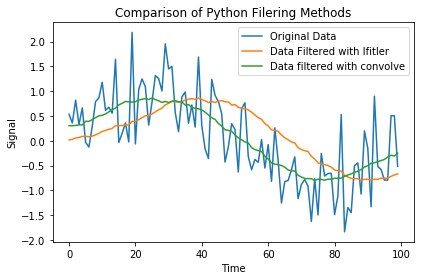

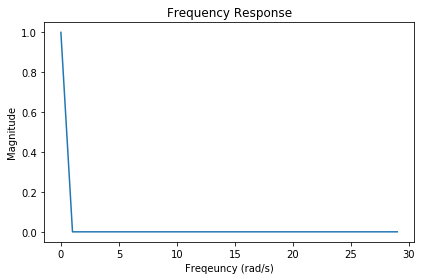

In [2]:
data = np.genfromtxt('signal_data.txt')
h = np.ones(30)/30

d_lfilter = signal.lfilter(h, 1, data)
d_convolve = signal.convolve(data, h, mode='same')

#Plotting of original data, convolved, and filtered
plt.figure()
plt.plot(data)
plt.plot(d_lfilter)
plt.plot(d_convolve)
plt.title('Comparison of Python Filering Methods')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(['Original Data', 'Data Filtered with lfitler', 'Data filtered with convolve'])
plt.tight_layout()

#Plot of freqeuncy response
plt.figure()
plt.plot(np.fft.fft(h))
plt.title('Frequency Response')
plt.xlabel('Freqeuncy (rad/s)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

### Task 2 - Analyze the Characteristics of Filters

In [3]:
def analyze(b, a, title):
    b = np.reshape(b, -1)
    a = np.reshape(a, -1)
    fig = plt.figure(figsize=(10, 8))
    fig.suptitle(title, fontsize='x-large')
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    # Plot frequency response
    w, h = signal.freqz(b, a, 1024)
    w_majors = np.array([0, 0.2, 0.4, 0.6, 0.8, 1]) * np.pi
    w_labels = ['0', r'$0.2\pi$', r'$0.4\pi$', r'$0.6\pi$', r'$0.8\pi$', r'$\pi$']
    ax = fig.add_subplot(221)
    ax.plot(w, 20 * np.log10(np.abs(h)))
    ax.set_xticks(w_majors)
    ax.set_xticklabels(w_labels)
    ax.set_title('Magnitude Response')
    ax.set_xlabel('Frequency [rad]')
    ax.set_ylabel('Gain [dB]')
    ax = fig.add_subplot(222)
    ax.plot(w, np.rad2deg(np.unwrap(np.angle(h))))
    ax.set_xticks(w_majors)
    ax.set_xticklabels(w_labels)
    ax.set_title('Phase Response')
    ax.set_xlabel('Frequency [rad]')
    ax.set_ylabel('Phase [deg]')

    # Plot impulse response
    x = np.zeros(50)
    x[0] = 1
    y = signal.lfilter(b, a, x)
    ax = fig.add_subplot(223)
    ax.stem(np.arange(len(y)), y)
    ax.set_title('Impulse Response')
    ax.set_xlabel('Time')
    ax.set_ylabel('Output')

    # Plot poles & zeros
    n_taps = max(len(b), len(a))
    b = np.pad(b, (0, n_taps - len(b)), 'constant')
    a = np.pad(a, (0, n_taps - len(a)), 'constant')
    z, p, k = signal.tf2zpk(b, a)
    ax = fig.add_subplot(224, projection='polar')

    ax.plot(np.angle(p), np.abs(p), 'x')
    ax.plot(np.angle(z), np.abs(z), 'o', markerfacecolor='none')
    lines, labels = ax.set_rgrids([1])
    for line in lines: line.set_color('black')
    ax.set_thetagrids([0, 90, 180, 270], ['Re(z)', 'Im(z)'])
    ax.set_rlabel_position(0)
    ax.spines['polar'].set_visible(False)
    ax.set_title('Poles & Zeros', y=1.1)

C:\Users\nahum\EE235\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)
C:\Users\nahum\EE235\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


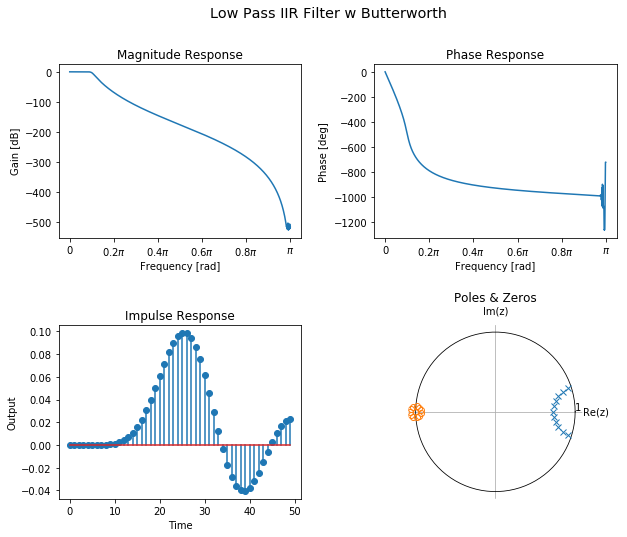

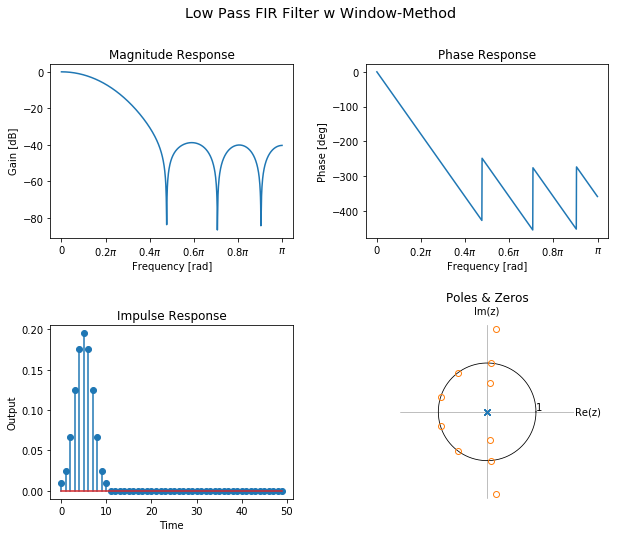

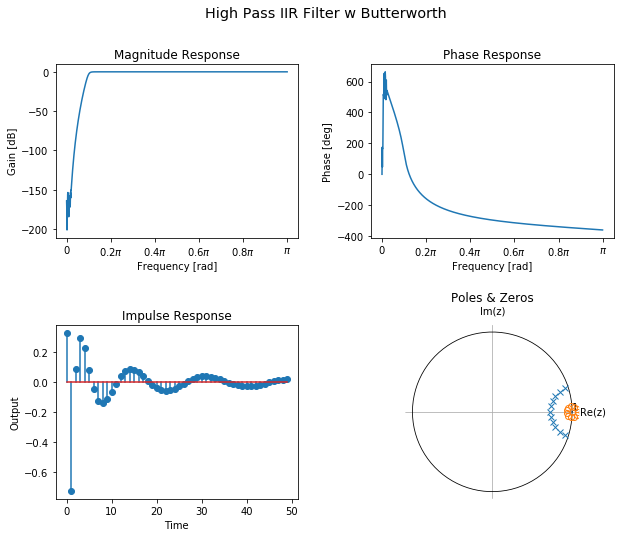

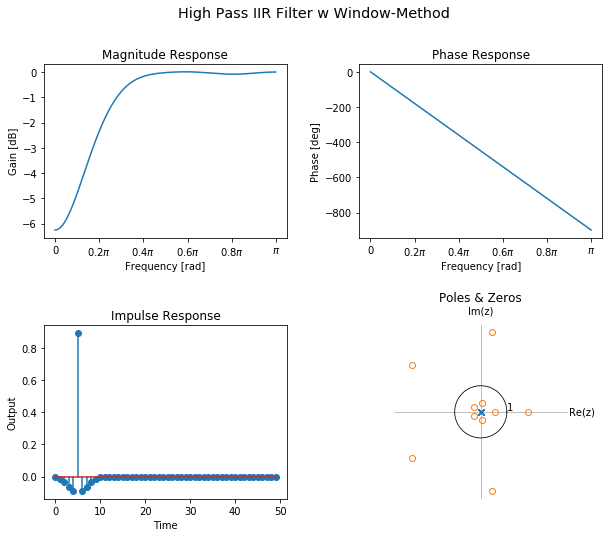

In [4]:
order = 11
w = 0.1

#Low Pass IIR Filter w Butterworth
b, a = signal.butter(order, w, 'lowpass')
analyze(b, a, 'Low Pass IIR Filter w Butterworth')

#Low Pass FIR Filter w Window-Design
b = signal.firwin(order, w)
analyze(b, 1, 'Low Pass FIR Filter w Window-Method')

#High Pass IIR Filter w Butterworth
d, c = signal.butter(order, w, 'highpass')
analyze(d, c, 'High Pass IIR Filter w Butterworth')

#High Pass IIR Filter w Window-Design
b = signal.firwin(order, w, pass_zero = False)
analyze(b, 1, 'High Pass IIR Filter w Window-Method')

C:\Users\nahum\EE235\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


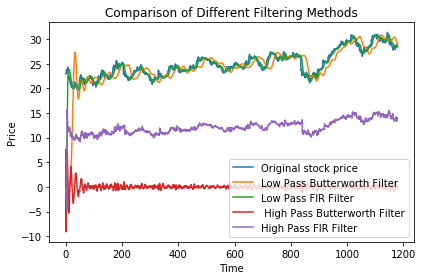

In [5]:
#Stock Data and Filtering
data = np.genfromtxt('microsoft_stock.txt')

#Low Pass IIR Filter w Butterworth
b, a = signal.butter(order, w, 'lowpass')
d_butterlow = signal.lfilter(b, a, data)

#Low Pass FIR Filter w Window-Design
b = signal.firwin(order, w)
d_firlow = signal.lfilter(b, 1, data)

#High Pass IIR Filter w Butterworth
d, c = signal.butter(order, w, 'highpass')
d_butterhigh = signal.lfilter(d, c, data)

#High Pass IIR Filter w Window-Design
b = signal.firwin(order, w, pass_zero = False)
d_firhigh = signal.lfilter(b, 1, data)

plt.figure()
plt.plot(data)
plt.plot(d_butterlow)
plt.plot(d_firlow)
plt.plot(d_butterhigh)
plt.plot(d_firhigh)
plt.title('Comparison of Different Filtering Methods')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Original stock price', 'Low Pass Butterworth Filter', 'Low Pass FIR Filter', ' High Pass Butterworth Filter', 'High Pass FIR Filter'])
plt.tight_layout()
plt.show()

C:\Users\nahum\EE235\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


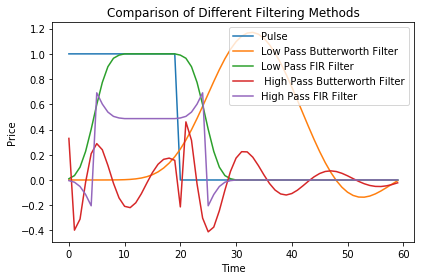

In [6]:
#Pulse and Filtering
order = 11
a = np.ones(20)
b = np.zeros(40)
pulse = np.concatenate([a,b])

#Low Pass IIR Filter w Butterworth
b, a = signal.butter(order, w, 'lowpass')
p_butterlow = signal.lfilter(b, a, pulse)

#Low Pass FIR Filter w Window-Design
b = signal.firwin(order, w)
p_firlow = signal.lfilter(b, 1, pulse)

#High Pass IIR Filter w Butterworth
d, c = signal.butter(order, w, 'highpass')
p_butterhigh = signal.lfilter(d, c, pulse)

#High Pass IIR Filter w Window-Design
b = signal.firwin(order, w, pass_zero = False)
p_firhigh = signal.lfilter(b, 1, pulse)

plt.figure()
plt.plot(pulse)
plt.plot(p_butterlow)
plt.plot(p_firlow)
plt.plot(p_butterhigh)
plt.plot(p_firhigh)
plt.title('Comparison of Different Filtering Methods')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Pulse', 'Low Pass Butterworth Filter', 'Low Pass FIR Filter', ' High Pass Butterworth Filter', 'High Pass FIR Filter'])
plt.tight_layout()
plt.show()


Between the two filters, the windowing filter seems to be best. In the time domain, you can see that the Windowing filters are sharper and more clear, while the butterworth looks much more messy, leading me to believe that the windowing filters are the better of the two.
Windowing is closest to the ideal filter, then comes butterworth.

### Task 3 - Implement the 3-Band Equalizer

In [7]:
#Load a WAV file
# Return the sampling rate and the sample array. 
def wav_load(file_name): 
    # Load the raw data. 
    sr, data = wav.read(file_name) 
    # Only use the first channel. 
    if data.ndim > 1: 
        data = data[:, 0] 
    
    # Convert to float32 quantization. 
    kind = data.dtype.kind 
    bits = data.dtype.itemsize * 8 
    data = data.astype('float32') 
    if kind == 'i' or kind == 'u': 
        data = data / 2 ** (bits - 1) 
        if kind == 'u': 
            data = data - 1 
    return sr, data

def play(samples, sample_rate): 
    sa.play_buffer((np.clip(samples, -1, 1) * 32767).astype('int16'), 1, 2, sample_rate).wait_done()

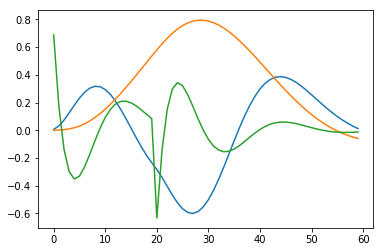

In [8]:
# b1, a1 = bandpass
# b2, a2 = lowpass
# b3, a3 = highpass

#Test Cell
#Bandpass
b1 = [11.713, 0, -23.457, 0, 11.713]
a1 = [1800, -6656.7, 9341, -5896.1, 1413.4]
p_filt1 = signal.lfilter(b1, a1, pulse)
plt.figure()
plt.plot(p_filt1)

#Lowpass
b2 = [0.2982, 0.89471, 0.89741, 0.2982]
a2 = [1800, -4989.8, 4625.2, -1433]
p_filt2 = signal.lfilter(b2, a2, pulse)
plt.plot(p_filt2)

#High Pass
b3 = [688.1, -2752.5, 4128.71, -2752.2, 688.12]
a3 = [1000, -3256.6, 4033.77, -2246, 473.51]
p_filt3 = signal.lfilter(b3, a3, pulse)
plt.plot(p_filt3)


In [9]:
sr, sound = wav_load('music.wav')
play(sound, sr)
g1 = 0
g2 = 0
g3 = 0



In [13]:
def equalizer(s, g1, g2, g3):
    #Bandpass
    b1 = [11.713, 0, -23.457, 0, 11.713]
    a1 = [1800, -6656.7, 9341, -5896.1, 1413.4]
    
    #Lowpass
    b2 = [0.2982, 0.89471, 0.89741, 0.2982]
    a2 = [1800, -4989.8, 4625.2, -1433]
    
    #High Pass
    b3 = [688.1, -2752.5, 4128.71, -2752.2, 688.12]
    a3 = [1000, -3256.6, 4033.77, -2246, 473.51]
    
    s_low = signal.lfilter(b2, a2, s) * (10**(g1/20))
    
    s_band = signal.lfilter(b1, a1, s) * (10**(g2/20))
    
    s_high = signal.lfilter(b3, a3, s) * (10**(g3/20))
    
    s_final = s_low + s_band + s_low
    
    return s_final
    

In [14]:
sr, sound = wav_load('music.wav')

new_sound1 = equalizer(sound, 0, 0, 0)
play(new_sound1, sr)

new_sound2 = equalizer(sound, -40, 0, 0)
play(new_sound2, sr)